In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
# import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import load_model

In [4]:
model=load_model("CNN_Downsampling_model.keras")

In [5]:
df1 = pd.read_csv('./downsampled_data.csv')

In [6]:
x=df1.drop('Class',axis=1)
y=df1['Class']

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [9]:
print(x_test.shape,y_test.shape)

(246, 30) (246,)


In [10]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [11]:
y_test_pred=model.predict(x_test)

8/8 [==============================] - 0s 2ms/step


In [12]:
y_test_pred=(y_test_pred>0.5).astype(int)

In [13]:
print("Accuracy on Training Data : ",accuracy_score(y_test,y_test_pred))

Accuracy on Training Data :  0.9390243902439024


In [14]:
print("Classification Report :\n",classification_report(y_test_pred,y_test))

Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       131
           1       0.92      0.96      0.94       115

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246



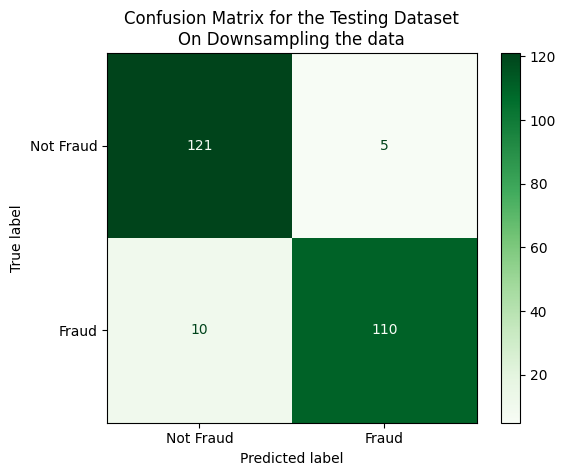

In [15]:
cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Greens')
plt.title('Confusion Matrix for the Testing Dataset\nOn Downsampling the data')
plt.show();